In [152]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [153]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets_diabetes.csv')

In [154]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [156]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


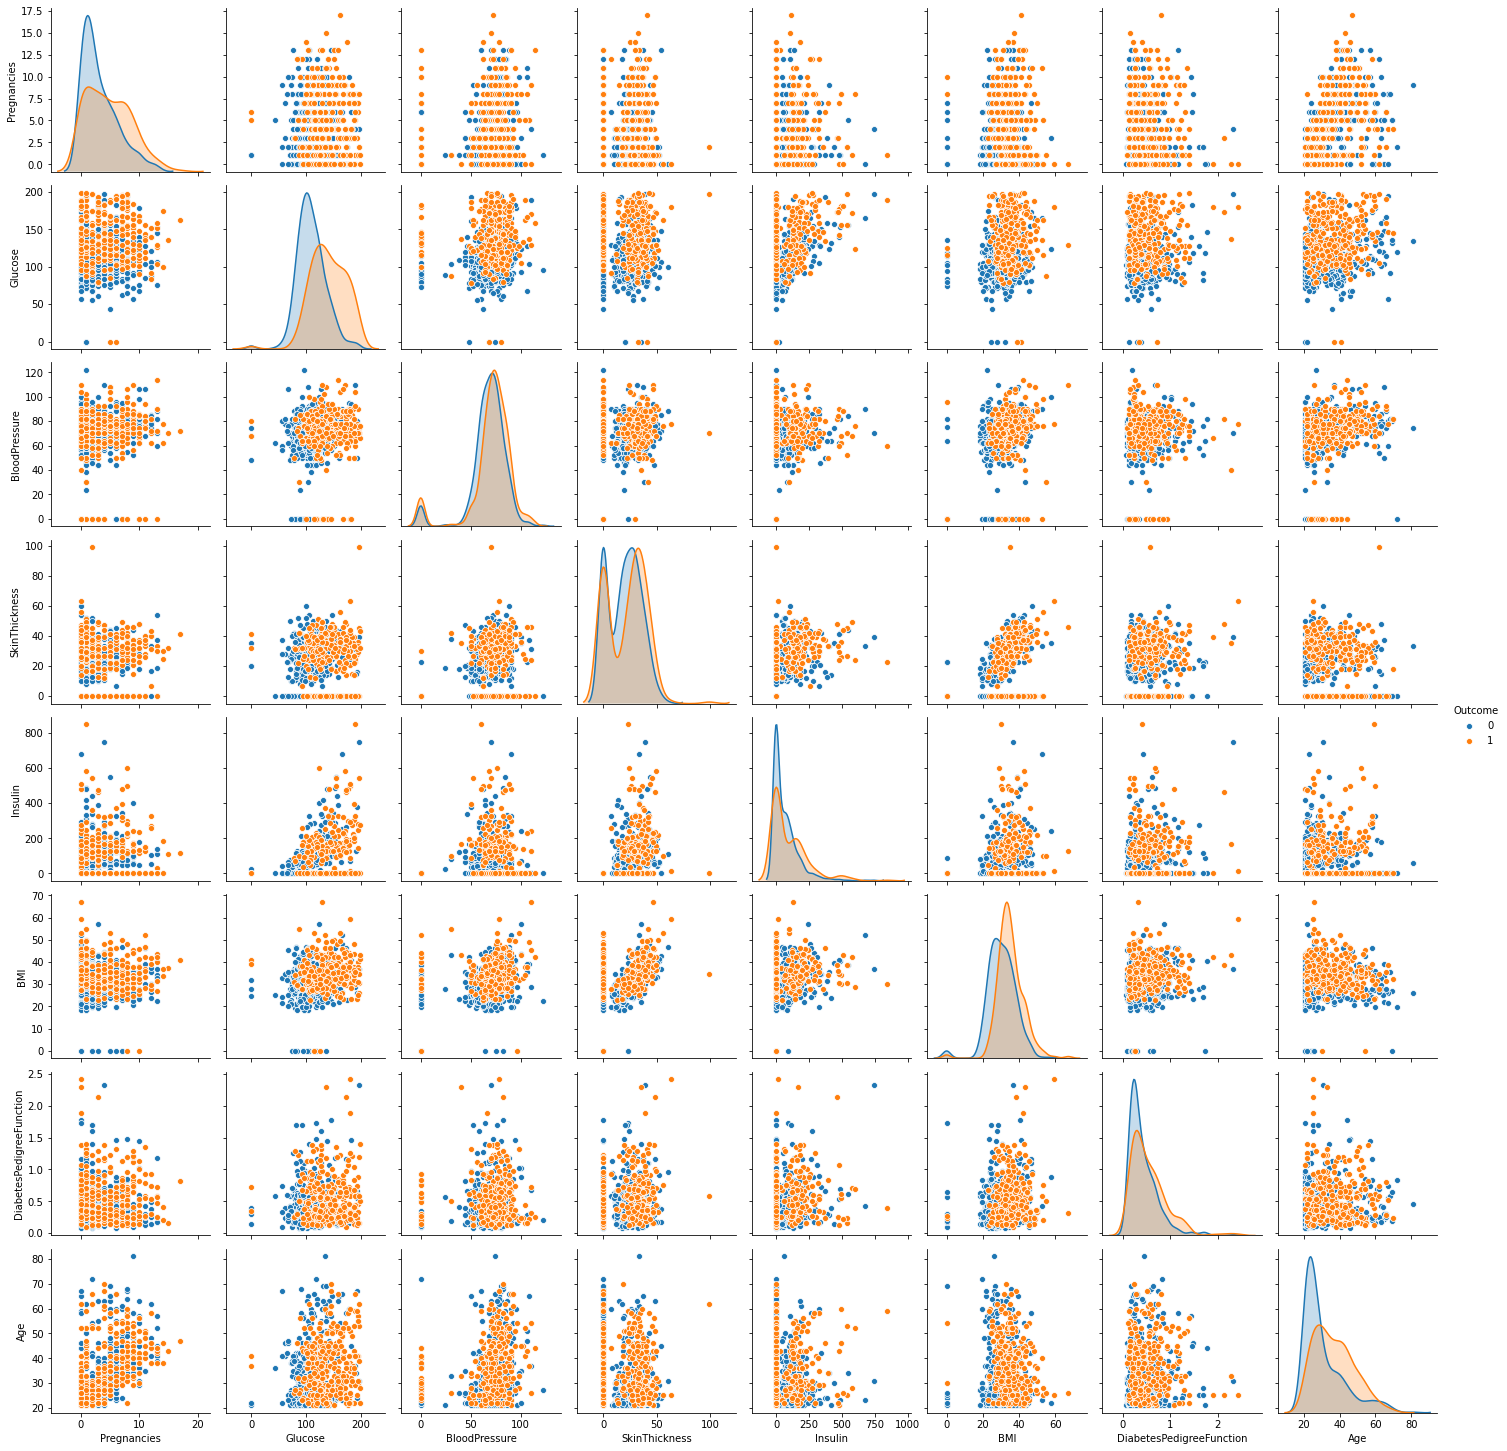

In [157]:
sns.pairplot(df, hue="Outcome")

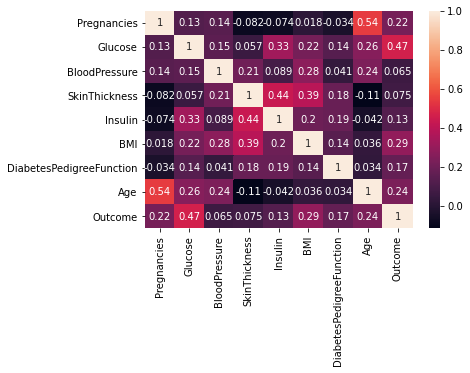

In [158]:
sns.heatmap(df.corr(), annot=True)

In [159]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [160]:
X=df.drop('Outcome', axis=1)
Y=df.Outcome

In [161]:
from imblearn.combine import SMOTETomek

In [162]:
#Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [163]:
X_res.shape,y_res.shape

((952, 8), (952,))

In [164]:
np.unique(y_res,return_counts=True)

(array([0, 1]), array([476, 476]))

In [165]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42, stratify=y_res) 

In [168]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [169]:
X_test

array([[-0.90742942,  1.40781276,  0.21469591, ...,  0.55549849,
        -1.28671815,  0.31632859],
       [-0.60902642, -0.62372686, -0.28969853, ..., -0.3067695 ,
         2.8388263 , -0.0336234 ],
       [-0.01222041, -0.38115497, -0.28969853, ..., -0.5257582 ,
        -1.16722829, -0.90850337],
       ...,
       [-0.90742942, -0.80565578,  0.11381702, ..., -1.01848276,
         0.50562967, -0.55855138],
       [ 0.88298859, -1.38176403,  0.41645368, ...,  1.91049105,
        -0.74272486,  0.66628058],
       [-0.01222041, -0.29019051, -0.28969853, ...,  0.06277392,
        -0.84020343, -0.90850337]])

In [170]:
from sklearn.cluster import KMeans, DBSCAN

In [171]:
from sklearn.metrics import silhouette_samples, silhouette_score

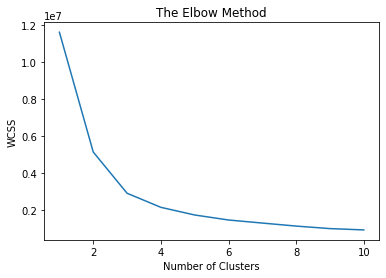

In [172]:
## within cluster sum of squares wcss
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [173]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 8]
X = X_train

For n_clusters = 2 The average silhouette_score is : 0.17559968062737594
For n_clusters = 3 The average silhouette_score is : 0.17897095155474982
For n_clusters = 4 The average silhouette_score is : 0.19692861979617643
For n_clusters = 5 The average silhouette_score is : 0.1873979000380783
For n_clusters = 6 The average silhouette_score is : 0.16686119603162766
For n_clusters = 8 The average silhouette_score is : 0.16725876443443094


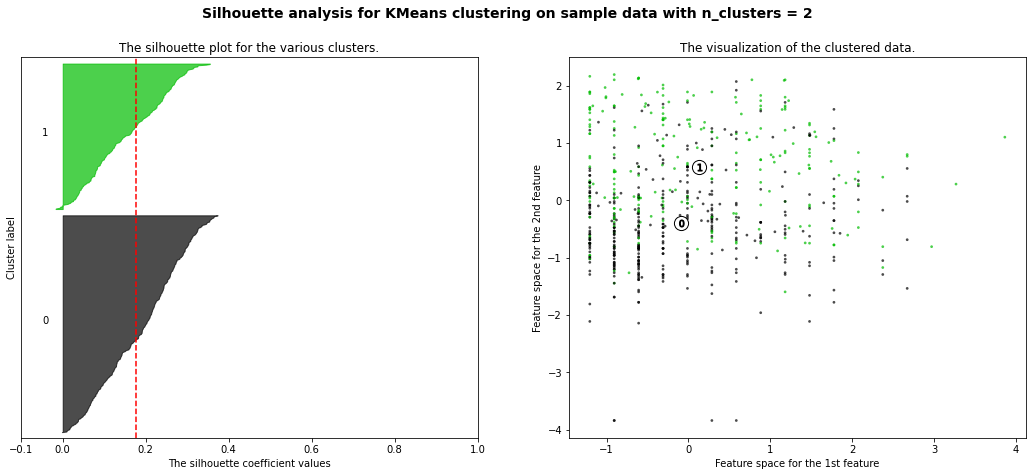

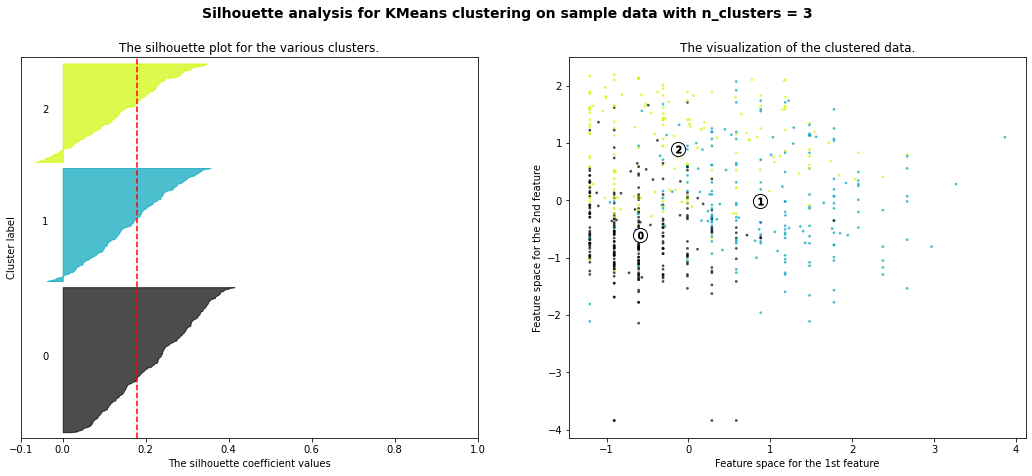

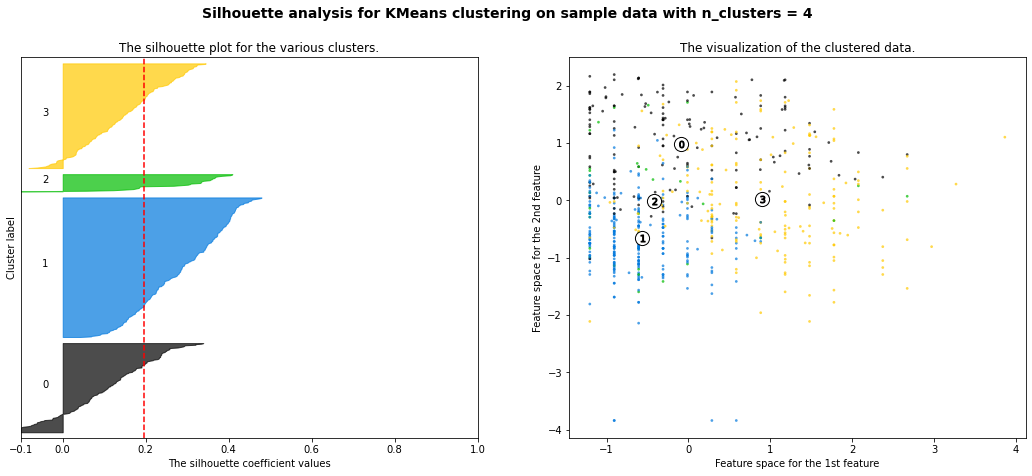

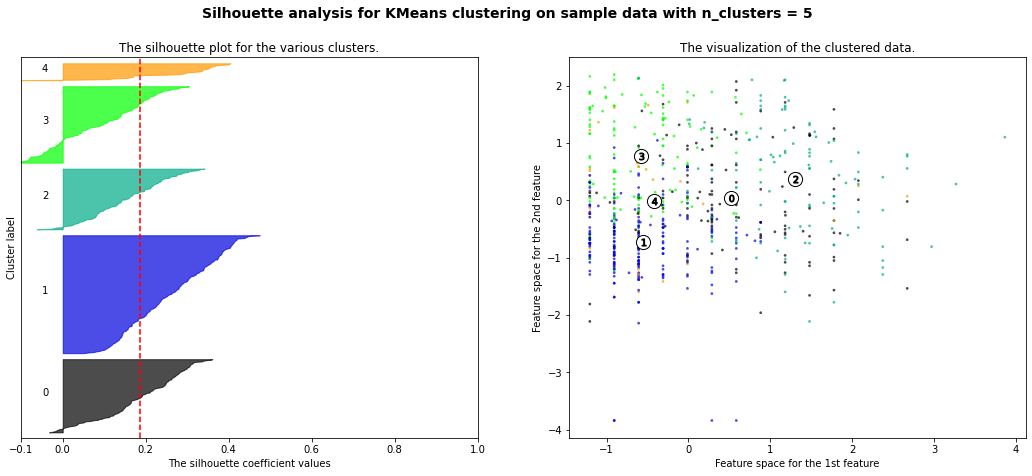

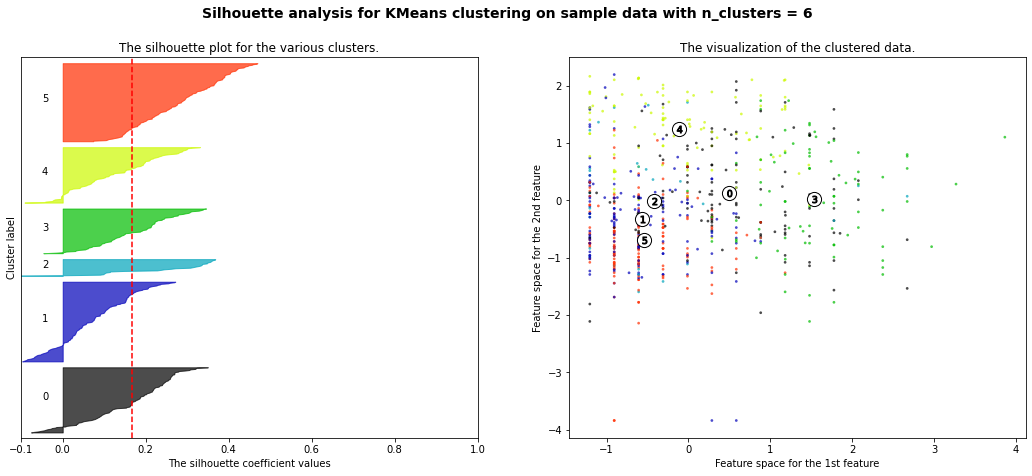

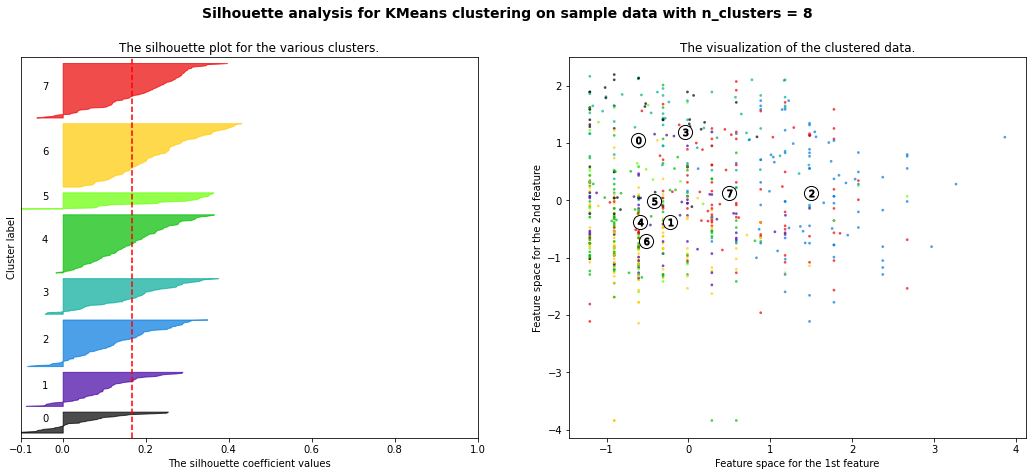

In [174]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, homogeneity_score, completeness_score, v_measure_score,adjusted_rand_score,adjusted_mutual_info_score

In [176]:
from time import time

In [185]:
def bench_k_means(estimator, name, data, labels):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             accuracy_score(labels, estimator.labels_),
             homogeneity_score(labels, estimator.labels_),
             completeness_score(labels, estimator.labels_),
             adjusted_rand_score(labels, estimator.labels_),
             adjusted_mutual_info_score(labels,  estimator.labels_),
             silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=300)),
             confusion_matrix(labels, estimator.labels_),
             classification_report(labels, estimator.labels_))

In [186]:
## Train Accuracy 66.9 %
bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10), name="k-means++", data=X_train, labels=y_train)

k-means++	0.06s	4187	0.669	0.088	0.090	0.113	0.088	0.174 [[244  74]
 [137 182]]               precision    recall  f1-score   support

           0       0.64      0.77      0.70       318
           1       0.71      0.57      0.63       319

    accuracy                           0.67       637
   macro avg       0.68      0.67      0.67       637
weighted avg       0.68      0.67      0.67       637



In [187]:
## Test Accuracy 65.4 %
bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10), name="k-means++", data=X_test, labels=y_test)

k-means++	0.05s	2070	0.654	0.070	0.071	0.092	0.068	0.176 [[112  46]
 [ 63  94]]               precision    recall  f1-score   support

           0       0.64      0.71      0.67       158
           1       0.67      0.60      0.63       157

    accuracy                           0.65       315
   macro avg       0.66      0.65      0.65       315
weighted avg       0.66      0.65      0.65       315



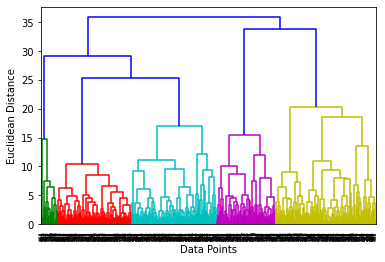

In [181]:
from scipy.cluster.hierarchy import linkage, dendrogram
merge = linkage(X_train, method="ward")
dendrogram(merge, leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel('Euclidean Distance')
plt.show()

In [182]:
#### DBSCAN 

In [183]:
dbscan=DBSCAN(eps=3,min_samples=4)

# Fitting the model

model=dbscan.fit(X_train, y_train)
labels=model.labels_

from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

print(metrics.silhouette_score(X_train,labels))


0.37433030532926276


In [184]:
print(accuracy_score(y_test, model.fit_predict(X_test)))
print(confusion_matrix(y_test, model.fit_predict(X_test)))
print(classification_report(y_test, model.fit_predict(X_test)))

0.49523809523809526
[[  0   0   0]
 [  2 156   0]
 [  5 152   0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.51      0.99      0.67       158
           1       0.00      0.00      0.00       157

    accuracy                           0.50       315
   macro avg       0.17      0.33      0.22       315
weighted avg       0.25      0.50      0.34       315



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
